In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import glob
from scipy.optimize import curve_fit

#Define the Gaussian function
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
    

In [4]:
ls -hrtl /UserData/maddalena/sacla2022/05-processed_I/

total 1.5M
-rwxrwxrwx 1 girelli girelli 5.5K Oct 29 20:52 water_1192421.npz*
-rwxrwxrwx 1 girelli girelli 5.5K Oct 29 20:52 water_1192422.npz*
-rwxrwxrwx 1 girelli girelli 5.5K Oct 29 20:52 water_1192423.npz*
-rwxrwxrwx 1 girelli girelli 5.5K Oct 29 20:52 water_1192424.npz*
-rwxrwxrwx 1 girelli girelli 5.5K Oct 29 20:52 water_1192425.npz*
-rwxrwxrwx 1 girelli girelli 5.5K Oct 29 20:52 water_1192426.npz*


Text(0.5, 0, '$q$ $\\rm (\\AA^{-1})$')

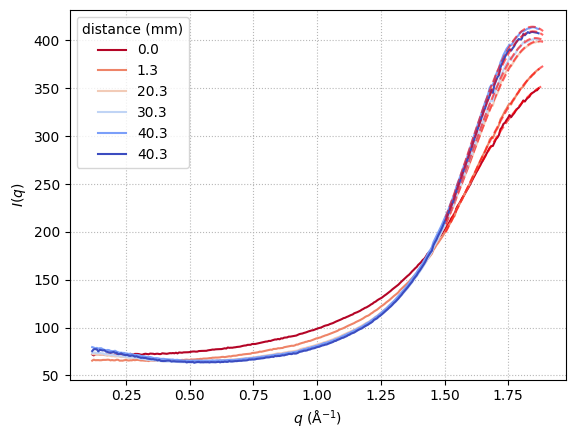

In [28]:
path='/UserData/maddalena/sacla2022/05-processed_I/'

runs=np.arange(1192421,1192427)
posz=np.array([22.20,23.5,42.5,52.5,62.5,62.5])-22.2

col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))
plt.figure()
f0=[ 100,   10, 1.8,   2]
l= [   0,    0, 1.5,   0]
u= [9000, 1000, 2.2, 100]

H=np.zeros(len(runs))
A=np.zeros(len(runs))
x0=np.zeros(len(runs))
sigma=np.zeros(len(runs))
dH=np.zeros(len(runs))
dA=np.zeros(len(runs))
dx0=np.zeros(len(runs))
dsigma=np.zeros(len(runs))

for i,run in enumerate(runs):
    file=np.load(f'{path}water_{run}.npz')
    
    q=file['q'] 
    I=file['I']
    plt.plot(q[3:-3],I[3:-3],c=col[i],label=str(np.round(posz[i],1)))
    popt, pcov =curve_fit(gauss,q[q>1.5],I[q>1.5],p0=f0, bounds=(l, u))
    plt.plot(q[q>1.5],gauss(q[q>1.5],popt[0],popt[1],popt[2],popt[3]),c='red',ls='dashed',alpha=.6)
    
    H[i]=popt[0]
    A[i]=popt[1]
    x0[i]=popt[2]
    sigma[i]=popt[3]
    
    dH[i] =np.sqrt(np.diag(pcov))[0]
    dA[i] =np.sqrt(np.diag(pcov))[1]
    dx0[i] =np.sqrt(np.diag(pcov))[2]
    dsigma[i] =np.sqrt(np.diag(pcov))[3]
    
    
    
plt.grid(ls=':',alpha=.9)
plt.legend(title='distance (mm)')
plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$')



Text(0, 0.5, 'hit rate %')

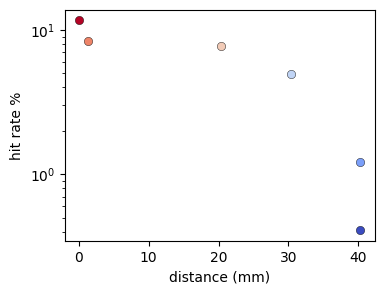

In [37]:
plt.figure(figsize=(4,3))
col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))

for i,run in enumerate(runs):
    file=np.load(f'{path}water_{run}.npz')
    plt.plot(posz[i],file['hit_rate']*100,'o',color=col[i], markeredgecolor='k', markeredgewidth=.3)
plt.yscale('log')
plt.xlabel('distance (mm)')
plt.ylabel('hit rate %')

Text(0, 0.5, 'sigma')

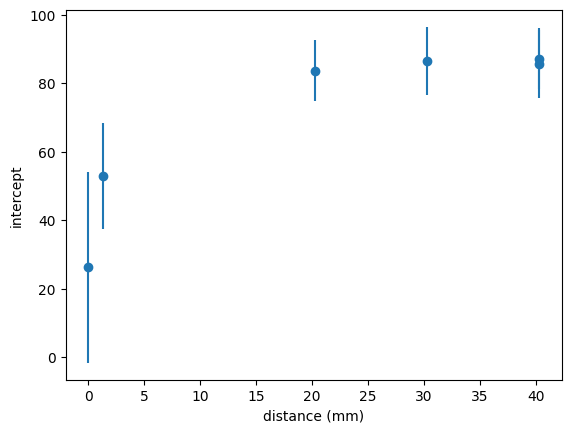

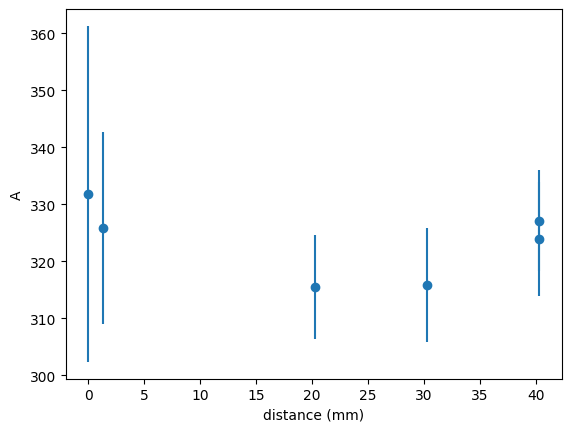

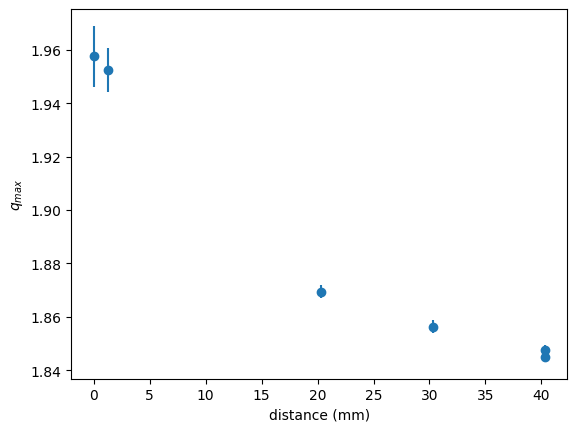

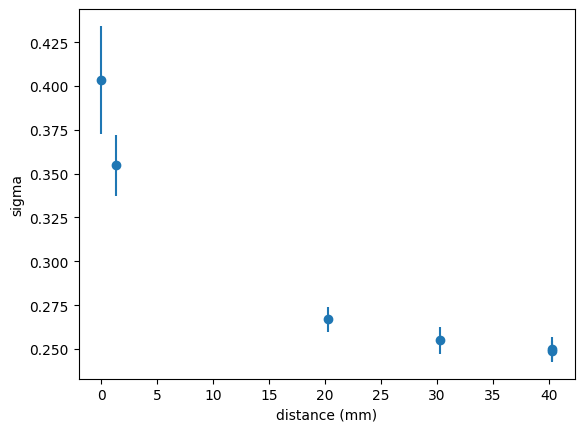

In [38]:
plt.figure()
plt.errorbar(posz,H,dH,marker='o',ls='')
plt.xlabel('distance (mm)')
plt.ylabel('intercept')

plt.figure()
plt.errorbar(posz,A,dA,marker='o',ls='')
plt.xlabel('distance (mm)')
plt.ylabel('A')

plt.figure()
plt.errorbar(posz,x0,dx0,marker='o',ls='')
plt.xlabel('distance (mm)')
plt.ylabel(r'$q_{max}$')

plt.figure()
plt.errorbar(posz,sigma,dsigma,marker='o',ls='')
plt.xlabel('distance (mm)')
plt.ylabel('sigma')

